# Cross-validation

**import libraries**

In [24]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import plotly.express as px

**validation**

There are some limitations to using a single validation set. One important consideration is that you will get different results (model scores) with different validation sets. A way around this is to use more than one validation set. There are a few different ways to do this.

**Cross-validation**

The method of cross-validation is where we divide the data into equal-sized sets. Some sets are used for training and the remaining set is used for testing. For each trial, a different set is used for testing.

**K-fold Cross-Validation**

For this method we divide the rows of our data set into k equally-sized sets or “folds”

**Cross-validation and Pipelines**

One issue with this method is that if you need to standardize your variables and you standardize before splitting into training and testing sets, you will inadvertently leak some knowledge to the testing set. For example, if you are standardizing by subtracting the mean and dividing by the standard deviation, your test data will know these statistics about the rest of the data.

For cross-validation, if you standardize your data before dividing into k-fold cross-validation sets, your test/validation set in each fold will also know something about the training data. To avoid the problem of data leakage, separate your training/testing set or cross-validation sets and then standardize.

### Cross validation with numbers dataset

In [3]:
# The deafult with 10 classes (digits 0-9)
digits = datasets.load_digits(n_class=10)

# Create the feature matrix
features = digits.data
print('The shape of the feature matrix: ', features.shape)

# Create the target array
target = digits.target
print('The shape of the target array: ', target.shape)
print('The unique classes in the target: ', np.unique(target))


The shape of the feature matrix:  (1797, 64)
The shape of the target array:  (1797,)
The unique classes in the target:  [0 1 2 3 4 5 6 7 8 9]


In [10]:
# Instantiate the standardizier
standardizer = StandardScaler()

# Instantiate the classifier
logreg = LogisticRegression(max_iter=150)

# Create the pipeline
pipeline = make_pipeline(standardizer, logreg)

# Instantiate the k-fold cross-validation
kfold_cv = KFold(n_splits=10, shuffle=True, random_state=11)

# Fit the model using k-fold cross-validation
cv_scores = cross_val_score(pipeline, features, target, cv=kfold_cv, scoring='accuracy')

In [11]:
# Print the mean score
print('All cv scores: ', cv_scores)

# Print the mean score
print('Mean of all cv scores: ', cv_scores.mean())

All cv scores:  [0.96666667 0.98888889 0.95555556 0.97777778 0.96666667 0.95
 0.97777778 0.96648045 0.97765363 0.96648045]
Mean of all cv scores:  0.9693947858472999


### Hyperparameter Tuning

In [15]:
# Load the digits data

# The deafult with 10 classes (digits 0-9)
digits = datasets.load_digits(n_class=10)

# Create the feature matrix
X = digits.data
print('The shape of the feature matrix: ', X.shape)

# Create the target array
y = digits.target
print('The shape of the target array: ', y.shape)
print('The unique classes in the target: ', np.unique(y))

The shape of the feature matrix:  (1797, 64)
The shape of the target array:  (1797,)
The unique classes in the target:  [0 1 2 3 4 5 6 7 8 9]


Using the decision tree classifier from the previous objective we'll vary the maximum depth of the tree and look at the accuracy score. The training scores should approach 1 (100% accuracy) as we expect. The testing scores will approach the accuracy of the model but likely won't be close to 100%, unless we have a really good model.

In [19]:
# Create the validation_curve
depth = range(1, 30, 3)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name='max_depth', param_range=depth, scoring='accuracy', n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

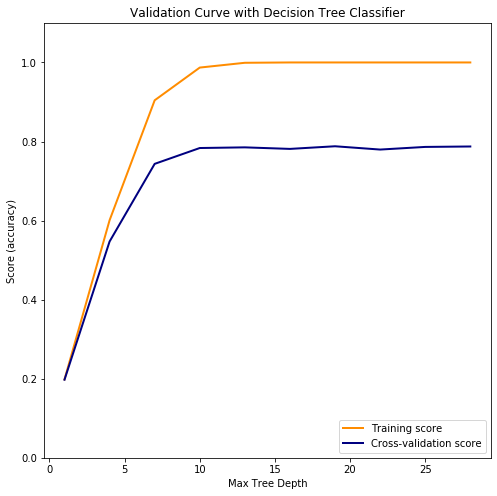

In [22]:
# Plot the validation curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(depth, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
ax.plot(depth, test_scores_mean, label="Cross-validation score",
             color="navy", lw=2)

ax.set_title("Validation Curve with Decision Tree Classifier")
ax.set_xlabel("Max Tree Depth")
ax.set_ylabel("Score (accuracy)")
ax.set_ylim(0.0, 1.1)

ax.legend(loc='lower right')

plt.show()

**Interpret the Curve**

In the curve above we varied one parameter to see if the model was overfitting or underfitting on that parameter. In this case, there is a big difference between the accuracy score when we validate or test the model. This might imply that the model isn't generalizing well to new data and is possibly overfit.

**Parameter Search**



In [48]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=10)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 4}
Best score is 0.6933395406579764


In [49]:
# Display cv results by ranking the test scores
import pandas as pd
pd.DataFrame(tree_cv.cv_results_).sort_values(by='rank_test_score').T

,2,5,3,6,9,4,1,0,7,8
mean_fit_time,0.00279617,0.00159581,0.00219829,0.00139647,0.00169537,0.00169489,0.00191548,0.00219464,0.0014945,0.00100296
std_fit_time,0.000739237,0.000661753,0.000744059,0.000661394,0.000456991,0.000456703,0.000699699,0.000870894,0.00049709,0.000446736
mean_score_time,0.000778317,9.97066e-05,0.000597095,0.000598335,0,0.000299096,0.000299931,0.000598669,0.000299406,3.94106e-05
std_score_time,0.000396413,0.00029912,0.000487569,0.000488539,0,0.000456877,0.000458157,0.000488811,0.000457351,0.000118232
param_criterion,entropy,gini,gini,gini,gini,entropy,gini,gini,entropy,entropy
param_max_depth,None,None,None,None,None,3,3,3,3,3
param_max_features,3,3,3,2,1,8,8,7,4,1
param_min_samples_leaf,4,8,5,5,2,2,5,7,2,7
params,"{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'entropy', 'max_depth': 3, 'max_...","{'criterion': 'gini', 'max_depth': 3, 'max_fea...","{'criterion': 'gini', 'max_depth': 3, 'max_fea...","{'criterion': 'entropy', 'max_depth': 3, 'max_...","{'criterion': 'entropy', 'max_depth': 3, 'max_..."
split0_test_score,0.722222,0.572222,0.644444,0.461111,0.605556,0.444444,0.372222,0.388889,0.416667,0.411111
